In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk import Text
from nltk import FreqDist
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [2]:
# 데이터 전처리
def preprocessing(text):
    #토큰화
    tokens = [word for sent in nltk.sent_tokenize(text)
              for word in nltk.word_tokenize(sent)]
    print('token word')
    #print(tokens)
    print()
    
    #불용어 제거
    stop=stopwords.words('english')
    tokens=[token for token in tokens if token not in stop]
    print('remove stopwords')
    #print(tokens)
    print()
    
    #소문자화
    tokens=[word.lower() for word in tokens]
    print('lower capitalization')
    #print(tokens)
    print()
    
    #표제어 추출
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    print( 'lemmatization')
    #print( tokens )
    print()
    
    tokens = [lmtzr.lemmatize(word, 'v') for word in tokens]
    print('lemmatization/verb' )
    #print( tokens )
    print()
    
    #어간추출
#     stemmer = PorterStemmer()
#     tokens = [ stemmer.stem(word) for word in tokens ]
#     print( 'stemming' )
#     print(tokens)
#     print()
    
    preprocessed_text= ' '.join(tokens)
    return preprocessed_text


In [3]:
# review가 가장 많은 호텔의 데이터
testdata=pd.read_csv('Hotel_Test.csv')
testdata

,Average_Score,Negative_Review,Positive_Review,Reviewer_Score
0,7.1,The car park was small and unpleasant People ...,The location was excellent for getting to the O2,7.9
1,7.1,We weren t told that the only spa facility op...,The house keeping lady made my boyfriends day...,8.3
2,7.1,I asked how far the O2 was and got told a 7 m...,No Positive,6.3
3,7.1,Hot stuffy room air con not working properly ...,The bed was OK,5.4
4,7.1,Although the price seems like it is cheap you...,The Receptionists and Cleaners are very polit...,6.3
...,...,...,...,...
4784,7.1,Long wait for check in arrived at 6 30pm and ...,No Positive,6.3
4785,7.1,concierge was uninformed,good value for money,7.9
4786,7.1,I had no complaints,Good location easy to park,8.3
4787,7.1,Really shabby and run down hotel Needs a tota...,Location was great staff pretty good and it w...,5.4


In [4]:
# positive, negative review를 각각 str로 변환
neg_rev=' '
pos_rev=' '
for i in range(len(testdata.index)):
    neg_rev=neg_rev+testdata['Negative_Review'][i]
    pos_rev=pos_rev+testdata['Positive_Review'][i]

In [5]:
# 전처리 실행
neg_proccessed=preprocessing(neg_rev)
pos_proccessed=preprocessing(pos_rev)

token word

remove stopwords

lower capitalization

lemmatization

lemmatization/verb

token word

remove stopwords

lower capitalization

lemmatization

lemmatization/verb



In [6]:
neg_proccessed

'the car park small unpleasant people mercedes bmws take 2 space we lucky get space drive around 10 time we tell spa facility open pool sauna already pay find enter spa area i ask far o2 get tell 7 minute walk way 2 train away i happy ok hot stuffy room air con work properly filthy window wallpaper rip wear bedside furniture tatty carpet wear damage bathroom door latch wear make door difficult open inside shower another era control bath tap poor shower curtain result wet floor carpet corridor wear tatty nasty musty aroma area all place around ten year overdue complete renovation although price seem like cheap pay extra everything like swim pool wifi fool sometimes come others extra like breakfast the hotel see better day include stairwell carpet quite threadbare the common part need decoration the quality towel bathroom good one set toiletry two people there item drug paraphernalia hall construction go around hotel many path close have pay extra use hotel pool spa health hazard stair l

In [7]:
pos_proccessed

'the location excellent get o2 the house keep lady make boyfriend day funny wasno positive the bed ok the receptionist cleaner polite friendly hard work staff we enjoy stay would come room clean enough amenity one could request anytime without problem my daughter i upgrade free charge executive room balcony water we enjoy quality price spice restaurant i delight find porridge breakfast jenny restaurant the electric fan welcome addition room could control room temperature ac quite easily short walk tube station although construction close many path staff friendly location good the bed nice could smoke room bouns i love layout hotel room overlook thames good bed room breakfast substantial well prepare location perfect need excellent value money friendly staff lot amenity broad range din option spa downstairs stone throw canary wharf have already recommend family friend last minute work stopover short break case need stay part london location good near train station bedroom big book room 

In [8]:
type(pos_proccessed)

str

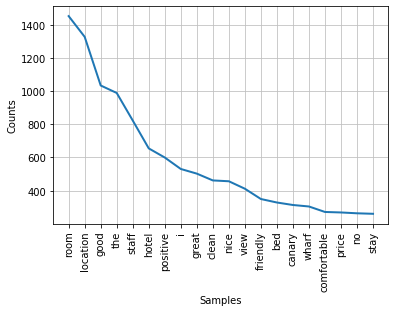

In [9]:
# pos_proccessed의 단어별 빈도수 시각화(20개)
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(pos_proccessed)
text=Text(retokenize.tokenize(pos_proccessed))
text.plot(20)

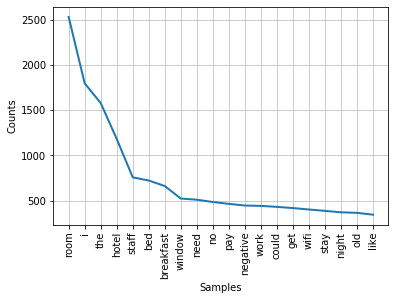

In [10]:
# neg_proccessed의 단어별 빈도수 시각화(20개)

retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(pos_proccessed)
text=Text(retokenize.tokenize(neg_proccessed))
text.plot(20)

In [12]:
# 긍정어사전, 부정어 사전 로드
pos = open('./positive-words.txt')
neg = open('./negative-words.txt')

In [13]:
# 각 사전의 사전의 단어를 list에 저장
pos_temp = []
neg_temp = []
while True:
    line = pos.readline()
    line = line.replace('\n', '')
    pos_temp.append(line)
    if not line: break
pos.close()

while True:
    line = neg.readline()
    line = line.replace('\n', '')
    neg_temp.append(line)
    if not line: break
neg.close()

In [14]:
# 품사찾기
tagged_list_pos = pos_tag(word_tokenize(pos_proccessed))
tagged_list_neg = pos_tag(word_tokenize(neg_proccessed))

In [15]:
# 명사, 부사, 형용사만 따로 리스트에 저장
filtered_list_pos = []
filtered_list_neg = []

include_list = ['NN', 'NNS', 'RBS', 'RBR', 'RB', 'JJS', 'JJR', 'JJ']
for t in tagged_list_pos :
    if t[1] in include_list:
        filtered_list_pos.append(t[0])
filtered_list_pos

for t in tagged_list_neg :
    if t[1] in include_list:
        filtered_list_neg.append(t[0])
filtered_list_neg

['car',
 'park',
 'small',
 'unpleasant',
 'people',
 'bmws',
 'space',
 'space',
 'drive',
 'time',
 'spa',
 'facility',
 'open',
 'pool',
 'sauna',
 'already',
 'enter',
 'spa',
 'area',
 'i',
 'far',
 'o2',
 'tell',
 'minute',
 'walk',
 'way',
 'train',
 'away',
 'i',
 'happy',
 'ok',
 'hot',
 'stuffy',
 'room',
 'air',
 'con',
 'work',
 'properly',
 'filthy',
 'window',
 'wallpaper',
 'rip',
 'wear',
 'bedside',
 'furniture',
 'tatty',
 'carpet',
 'wear',
 'damage',
 'bathroom',
 'door',
 'latch',
 'door',
 'difficult',
 'open',
 'shower',
 'era',
 'control',
 'bath',
 'tap',
 'poor',
 'shower',
 'curtain',
 'result',
 'wet',
 'floor',
 'carpet',
 'corridor',
 'tatty',
 'nasty',
 'musty',
 'aroma',
 'area',
 'place',
 'around',
 'year',
 'overdue',
 'complete',
 'renovation',
 'price',
 'cheap',
 'pay',
 'everything',
 'swim',
 'pool',
 'wifi',
 'fool',
 'sometimes',
 'come',
 'others',
 'breakfast',
 'hotel',
 'better',
 'day',
 'stairwell',
 'carpet',
 'quite',
 'common',
 'part'

In [16]:
# 긍정어사전, 부정어 사전에 없는 단어들만 저장
pos_new = []
neg_new = []
for p in range(len(filtered_list_pos)):
    if filtered_list_pos[p] not in pos_temp:
        if filtered_list_pos[p] not in neg_temp:
            pos_new.append(filtered_list_pos[p])

for n in range(len(filtered_list_neg)):
    if filtered_list_neg[n] not in pos_temp:
        if filtered_list_neg[n] not in neg_temp:
            neg_new.append(filtered_list_neg[n])        

In [17]:
# 빈도 수 중 상위 50개 필터링
fd_pos = FreqDist(pos_new)
fd_pos=fd_pos.most_common(50)
fd_pos = dict(fd_pos)
fd_neg = FreqDist(neg_new)
fd_neg=fd_neg.most_common(50)
fd_neg = dict(fd_neg)

In [18]:
fd_pos # positive review에서 나타난 단어들의 빈도 수

{'room': 1451,
 'location': 1323,
 'staff': 822,
 'hotel': 640,
 'i': 498,
 'view': 390,
 'canary': 313,
 'wharf': 276,
 'price': 268,
 'breakfast': 241,
 'value': 226,
 'bed': 202,
 'close': 175,
 'restaurant': 167,
 'upgrade': 165,
 'area': 157,
 'money': 151,
 'service': 151,
 'nothing': 149,
 'size': 148,
 'really': 144,
 'very': 139,
 'bar': 137,
 'food': 136,
 'window': 130,
 'stay': 129,
 'facility': 124,
 'tube': 121,
 'london': 115,
 'station': 113,
 'reception': 110,
 'everything': 106,
 'big': 105,
 'book': 105,
 'walk': 94,
 'night': 89,
 'bathroom': 89,
 'positiveno': 88,
 'place': 84,
 'large': 78,
 'also': 75,
 'check': 73,
 'pool': 69,
 'even': 68,
 'time': 67,
 'minute': 65,
 'day': 62,
 'little': 62,
 'u': 61,
 'look': 55}

In [19]:
fd_neg # negative review에서 나타난 단어들의 빈도 수

{'room': 2528,
 'i': 1686,
 'hotel': 1156,
 'staff': 758,
 'breakfast': 628,
 'window': 470,
 'bed': 448,
 'night': 372,
 'old': 366,
 'wifi': 340,
 'date': 305,
 'time': 301,
 'book': 294,
 'pay': 291,
 'tire': 276,
 'bite': 267,
 'service': 267,
 'air': 265,
 'bathroom': 259,
 'reception': 250,
 'even': 239,
 'day': 238,
 'park': 230,
 'also': 223,
 'price': 210,
 'nothing': 206,
 'look': 200,
 'little': 198,
 'really': 195,
 'food': 194,
 'charge': 190,
 'open': 189,
 'shower': 189,
 'very': 186,
 'need': 182,
 'decor': 178,
 'stay': 178,
 'pool': 173,
 'door': 172,
 'use': 169,
 'water': 169,
 'check': 167,
 'carpet': 165,
 'double': 163,
 'restaurant': 161,
 'u': 159,
 'floor': 157,
 'facility': 154,
 'area': 152,
 'sleep': 147}

In [20]:
# 필터링한 데이터를 dataframe 형식의 csv 파일로 각각 저장
posi=pd.DataFrame()
posi['keyword']=fd_pos.keys()
posi['num']=fd_pos.values()
posi.sort_values(by='num',ascending=False,inplace=True)
posi.to_csv('pos.csv')

nega=pd.DataFrame()
nega['keyword']=fd_neg.keys()
nega['num']=fd_neg.values()
nega.sort_values(by='num',ascending=False,inplace=True)
nega.to_csv('neg.csv')

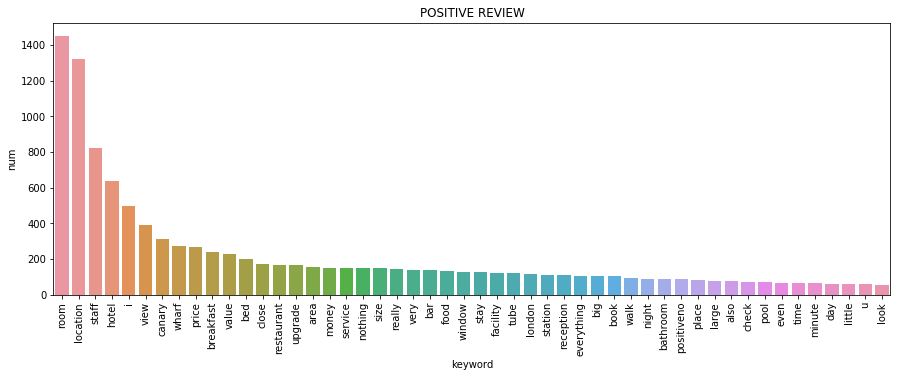

In [28]:
# positive review에서 많이 나타난 50개의 단어의 빈도수 출력
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.title('POSITIVE REVIEW')
sns.barplot(x=posi['keyword'], y=posi['num'], data=posi)

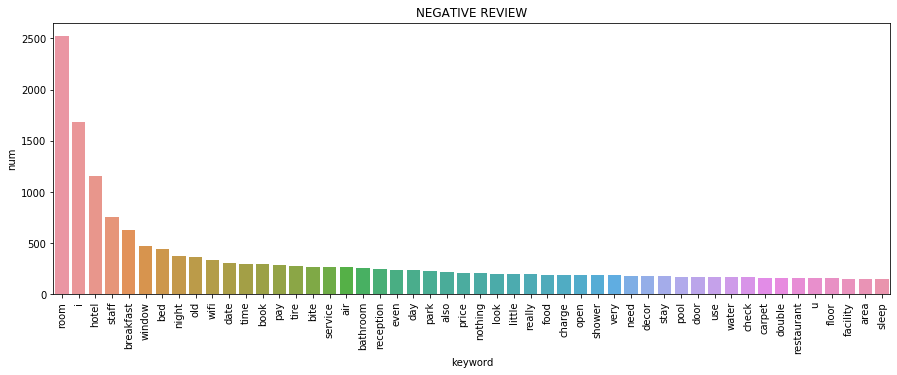

In [29]:
# negative review에서 많이 나타난 50개의 단어의 빈도수 출력
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.title('NEGATIVE REVIEW')
# plt.plot(nega['keyword'], nega['num'])
sns.barplot(x=nega['keyword'], y=nega['num'], data=nega)

In [23]:
# positive review와 negative review에서 겹치는 단어 수집
overlap = []
for i in range(len(posi['keyword'])):
    for j in range(len(nega['keyword'])):
        if posi['keyword'][i] == nega['keyword'][j]:
            temp = []
            temp.append(posi['keyword'][i])
            temp.append('positive')
            temp.append(posi['num'][i])
            overlap.append(temp)
            temp = []
            temp.append(nega['keyword'][j])
            temp.append('negative')
            temp.append(nega['num'][j])
            overlap.append(temp)

In [24]:
# 서로 겹치는 단어들의 dataframe 생성
over = pd.DataFrame(columns = ['keyword', 'label', 'num'])
for i in range(len(overlap)):
    over.loc[i] = overlap[i]

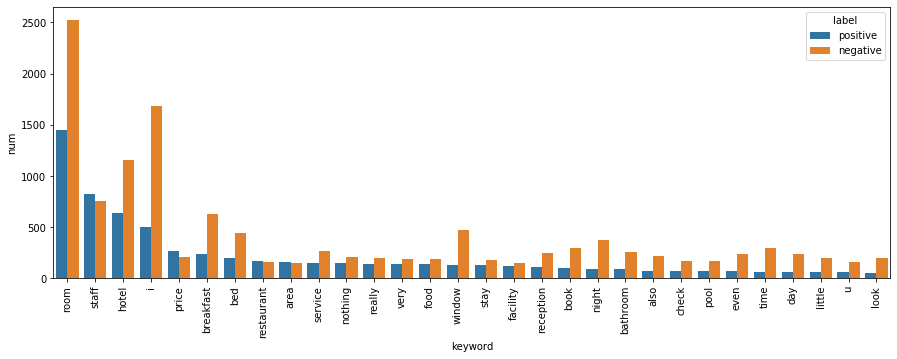

In [25]:
# 그래프 구현
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x=over['keyword'], y=over['num'], hue=over['label'], data=over)